In [1]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.2 MB/s eta 0:00:00


In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np


In [10]:
circuit=QuantumCircuit(2,2)
circuit.x(1)
circuit.barrier()
circuit.h(0)
circuit.h(1)

circuit.cx(0,1)
circuit.h(0)
circuit.h(1)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw()


░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ──────░─┤ H ├──■──┤ H ├─░─┤M├───
     ┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ┤ X ├─░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
     └───┘ ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

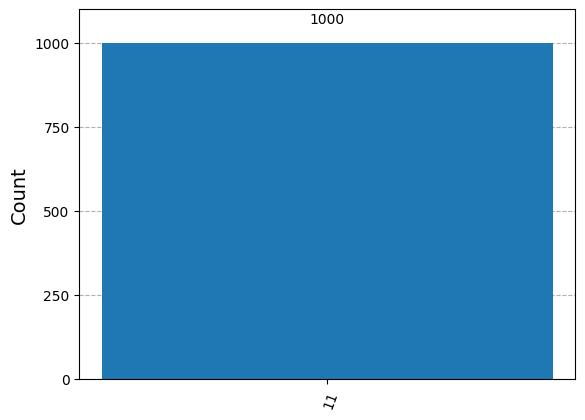

In [11]:
backend=AerSimulator()
transpiled_circuit=transpile(circuit,backend)
job=backend.run(transpiled_circuit, shots=1000)
result=job.result()
counts=result.get_counts()
plot_histogram(counts)

In [16]:
!pip install qiskit qiskit-ibm-provider



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.7 MB/s eta 0:00:00


In [22]:
!pip install --upgrade qiskit qiskit-ibm-provider

In [27]:
# Install necessary packages in Google Colab
!pip install qiskit qiskit-ibm-provider
!pip install --upgrade qiskit

Quantum Circuit:
           ░ ┌───┐     ┌───┐ ░ ┌─┐   
q_0: ──────░─┤ H ├──■──┤ H ├─░─┤M├───
     ┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ └╥┘┌─┐
q_1: ┤ X ├─░─┤ H ├┤ X ├┤ H ├─░──╫─┤M├
     └───┘ ░ └───┘└───┘└───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 

Transpilation successful!

Job ID: cxynd1m082700084dz0g

Measurement Results:
{'10': 92, '11': 3736, '00': 87, '01': 85}


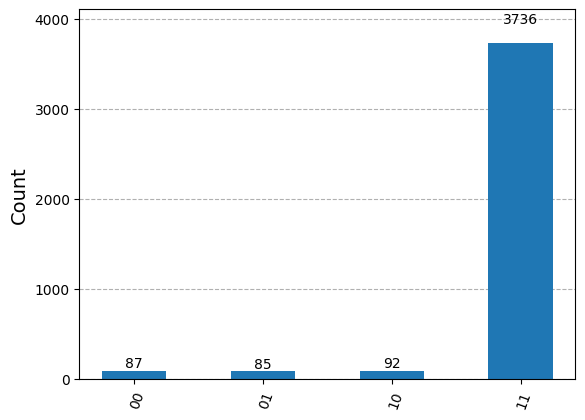

In [31]:
# Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider

# Authenticate using your IBM Quantum token
IBMProvider.save_account(token="2a26ead215681ec3ef00a4c0347f743fd1c9a94829d90cd96002f04741f81f39de8da8f341f1b309aaccc3972afbfdad6690ee7a330b159c2d526c5f2827f399", overwrite=True)
provider = IBMProvider()

# Select a real quantum device
backend = provider.get_backend('ibm_brisbane')  # Use any available backend

# Get backend configuration and properties
backend_config = backend.configuration()
backend_properties = backend.properties()

# Create a quantum circuit
qc=QuantumCircuit(2,2)
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)

qc.cx(0,1)
qc.h(0)
qc.h(1)
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw()

print("Quantum Circuit:")
print(qc)

# Transpile with explicit basis gates and coupling map
try:
    transpiled_qc = transpile(
        qc,
        backend=backend,
        basis_gates=backend_config.basis_gates,  # Use backend's basis gates
        coupling_map=backend_config.coupling_map,  # Use backend's coupling map
        optimization_level=1,  # Set optimization level (0-3)
        translation_method='synthesis' # Explicitly set the translation method to 'synthesis' or 'unroller'
    )
    print("\nTranspilation successful!")
except Exception as e:
    print(f"Error during transpilation: {e}")
    raise

# Execute the transpiled circuit on the backend
job = backend.run(transpiled_qc)
print(f"\nJob ID: {job.job_id()}")

# Wait for the job to complete and get results
result = job.result()
counts = result.get_counts()
print("\nMeasurement Results:")
print(counts)
plot_histogram(counts)
